In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score

customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');


# transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
# transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# transactions = pd.get_dummies(transactions, columns=['supplier_code']);

# features = ['quantity', 'price'] + [col for col in transactions.columns if col.startswith('supplier_code_')];

# tree.fit(X = transactions[features], y = transactions['late'])

# plt.figure(figsize=(25,20))
# plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
# plt.tight_layout
# plt.show()


# y_pred = tree.predict(transactions[features])
# y_true = transactions['late']
# cm = confusion_matrix(y_true, y_pred)
# cm_transposed = cm.T

# disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
#                              display_labels=['on time', 'late'])

# # Create a figure and plot
# fig, ax = plt.subplots(figsize=(8, 6))
# disp.plot(ax=ax, cmap='Blues')
# plt.xlabel('True label')  # This will now be on the x-axis
# plt.ylabel('Predicted label')  # This will now be on the y-axis
# plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
# plt.show()

# accuracy_score(y_true = y_true , y_pred = y_pred);
# precision_score(y_true = y_true , y_pred = y_pred);
# recall_score(y_true = y_true , y_pred = y_pred);

In [41]:
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

In [42]:
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

In [ ]:
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()


transactions2 = pd.get_dummies(transactions, columns=['Weekday'])

In [44]:
transactions2 = pd.get_dummies(transactions2, columns=['Months'])


bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

In [45]:
transactions3.columns

Index(['customer', 'material_code', 'warehouse_code', 'logistic_partner_code',
       'order_date', 'requested_date', 'received_date', 'quantity', 'price',
       'id', 'late', 'Weekday_Friday', 'Weekday_Monday', 'Weekday_Saturday',
       'Weekday_Sunday', 'Weekday_Thursday', 'Weekday_Tuesday',
       'Weekday_Wednesday', 'Months_April', 'Months_August', 'Months_December',
       'Months_February', 'Months_January', 'Months_July', 'Months_June',
       'Months_March', 'Months_May', 'Months_November', 'Months_October',
       'Months_September', 'price_category_0-20', 'price_category_20-40',
       'price_category_40-60', 'price_category_60-80', 'price_category_80-100',
       'price_category_100-120', 'price_category_120-140',
       'price_category_140-160', 'price_category_160-180',
       'price_category_180-200', 'price_category_200-220'],
      dtype='object')

In [46]:
transactions2.head()

,customer,material_code,warehouse_code,logistic_partner_code,order_date,requested_date,received_date,quantity,price,id,...,Months_February,Months_January,Months_July,Months_June,Months_March,Months_May,Months_November,Months_October,Months_September,price_category
0,Perk Up Coffee,c_3,7,9,2021-10-09,2021-11-06,2021-11-13,200,22.469120,90c72078-4986-4d20-a5d9-8a93cbf17da3,...,False,False,False,False,False,False,True,False,False,20-40
1,Perk Up Coffee,c_7,3,6,2019-03-26,2019-04-25,2019-05-01,50,20.305007,666c7364-cf12-4bf3-b021-2a34c98d0b94,...,False,False,False,False,False,True,False,False,False,20-40
2,Espresso Emporium,c_6,3,1,2019-01-31,2019-02-13,2019-02-06,750,18.089271,d9c511af-1b02-46e5-80e1-d1c2ff419dc4,...,True,False,False,False,False,False,False,False,False,0-20
3,The Roasted Root,c_0,4,3,2021-07-23,2021-08-01,2021-08-11,8,94.439540,afb34826-68a1-466d-b3c5-f3b1c9c0711c,...,False,False,False,False,False,False,False,False,False,80-100
4,Coffee Culture,c_6,1,9,2018-11-17,2018-12-03,2018-11-27,500,19.526868,e2dc9bed-7035-456f-9e8d-14bccadda722,...,False,False,False,False,False,False,True,False,False,0-20


In [47]:
#features = ['weeks', 'months','quantity' , 'difference between requested and received date']

In [48]:
transactions

,customer,material_code,warehouse_code,logistic_partner_code,order_date,requested_date,received_date,quantity,price,id,late,Weekday,Months
0,Perk Up Coffee,c_3,7,9,2021-10-09,2021-11-06,2021-11-13,200,22.469120,90c72078-4986-4d20-a5d9-8a93cbf17da3,True,Saturday,November
1,Perk Up Coffee,c_7,3,6,2019-03-26,2019-04-25,2019-05-01,50,20.305007,666c7364-cf12-4bf3-b021-2a34c98d0b94,True,Thursday,May
2,Espresso Emporium,c_6,3,1,2019-01-31,2019-02-13,2019-02-06,750,18.089271,d9c511af-1b02-46e5-80e1-d1c2ff419dc4,False,Wednesday,February
3,The Roasted Root,c_0,4,3,2021-07-23,2021-08-01,2021-08-11,8,94.439540,afb34826-68a1-466d-b3c5-f3b1c9c0711c,True,Sunday,August
4,Coffee Culture,c_6,1,9,2018-11-17,2018-12-03,2018-11-27,500,19.526868,e2dc9bed-7035-456f-9e8d-14bccadda722,False,Monday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Perk Up Coffee,c_6,3,8,2019-01-25,2019-02-15,2019-02-16,15,18.194036,89826132-41c7-46f9-b1d0-28ad13c915ff,True,Friday,February
4996,Perk Up Coffee,c_7,3,10,2019-06-07,2019-07-07,2019-07-10,75,21.810675,95ec9336-0c88-4515-879b-f45268dceaae,True,Sunday,July
4997,Perk Up Coffee,c_5,2,9,2023-03-09,2023-03-13,2023-03-10,750,32.132725,0cd166e1-608d-4297-ae39-c98036f33e7e,False,Monday,March
4998,The Roasted Root,c_5,7,4,2024-08-12,2024-09-09,2024-09-05,250,41.981564,e8cf5c62-57fd-457e-9982-7042783972ec,False,Monday,September


In [49]:
customer

,id,name,group,country,city,street,postal_code
0,1,Fantastic Coffee,retailer,Netherlands,Amsterdam,Prinsengracht,NaN
1,2,Startrucks,coffee shop,United Staes,Washington,NaN,NaN
2,3,Baltasar,coffee shop,Germany,Hamburg,NaN,NaN
3,4,Sefredi,retailer,Italy,Siena,NaN,NaN
4,5,Coffee Lab,retailer,Turkey,Istanbul,NaN,NaN
5,6,Brewtopia,coffee shop,Spain,Madrid,NaN,NaN
6,7,Java Joy,retailer,Spain,Barcelona,NaN,NaN
7,8,Bean Boulevard,retailer,Portugal,Porto,NaN,NaN
8,9,Cuppa Joe,coffee shop,USA,Boston,NaN,NaN
9,10,Espresso Emporium,coffee shop,France,Paris,NaN,NaN


In [50]:
materials

,item_code,item_group,stock_uom,item_name,category,price
0,c_0,coffee beans,kg,Jamaican Blue,luxury,200
1,c_1,coffee beans,kg,Arabica,basic,40
2,c_2,coffee beans,kg,Robusta,basic,30
3,c_3,coffee beans,kg,Liberica,basic,44
4,c_4,coffee beans,kg,Excelsa,basic,54
5,c_5,coffee beans,kg,Maragogype,premium,70
6,c_6,coffee beans,kg,Maragogype Type B,premium,69
7,c_7,coffee beans,kg,Arabica Type B,premium,85


In [51]:
transactions

,customer,material_code,warehouse_code,logistic_partner_code,order_date,requested_date,received_date,quantity,price,id,late,Weekday,Months
0,Perk Up Coffee,c_3,7,9,2021-10-09,2021-11-06,2021-11-13,200,22.469120,90c72078-4986-4d20-a5d9-8a93cbf17da3,True,Saturday,November
1,Perk Up Coffee,c_7,3,6,2019-03-26,2019-04-25,2019-05-01,50,20.305007,666c7364-cf12-4bf3-b021-2a34c98d0b94,True,Thursday,May
2,Espresso Emporium,c_6,3,1,2019-01-31,2019-02-13,2019-02-06,750,18.089271,d9c511af-1b02-46e5-80e1-d1c2ff419dc4,False,Wednesday,February
3,The Roasted Root,c_0,4,3,2021-07-23,2021-08-01,2021-08-11,8,94.439540,afb34826-68a1-466d-b3c5-f3b1c9c0711c,True,Sunday,August
4,Coffee Culture,c_6,1,9,2018-11-17,2018-12-03,2018-11-27,500,19.526868,e2dc9bed-7035-456f-9e8d-14bccadda722,False,Monday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Perk Up Coffee,c_6,3,8,2019-01-25,2019-02-15,2019-02-16,15,18.194036,89826132-41c7-46f9-b1d0-28ad13c915ff,True,Friday,February
4996,Perk Up Coffee,c_7,3,10,2019-06-07,2019-07-07,2019-07-10,75,21.810675,95ec9336-0c88-4515-879b-f45268dceaae,True,Sunday,July
4997,Perk Up Coffee,c_5,2,9,2023-03-09,2023-03-13,2023-03-10,750,32.132725,0cd166e1-608d-4297-ae39-c98036f33e7e,False,Monday,March
4998,The Roasted Root,c_5,7,4,2024-08-12,2024-09-09,2024-09-05,250,41.981564,e8cf5c62-57fd-457e-9982-7042783972ec,False,Monday,September


In [52]:
# features = ['quantity','price'] + [col for col in transactions2.columns if col.startswith('Months_')] + [col for col in transactions2.columns if col.startswith('Weekday_')];

features = (['quantity'] + 
[col for col in transactions3.columns if col.startswith('Months_')] + 
[col for col in transactions3.columns if col.startswith('Weekday_')] +
[col for col in transactions3.columns if col.startswith('price_category_')]);

In [53]:
features

['quantity',
 'Months_April',
 'Months_August',
 'Months_December',
 'Months_February',
 'Months_January',
 'Months_July',
 'Months_June',
 'Months_March',
 'Months_May',
 'Months_November',
 'Months_October',
 'Months_September',
 'Weekday_Friday',
 'Weekday_Monday',
 'Weekday_Saturday',
 'Weekday_Sunday',
 'Weekday_Thursday',
 'Weekday_Tuesday',
 'Weekday_Wednesday',
 'price_category_0-20',
 'price_category_20-40',
 'price_category_40-60',
 'price_category_60-80',
 'price_category_80-100',
 'price_category_100-120',
 'price_category_120-140',
 'price_category_140-160',
 'price_category_160-180',
 'price_category_180-200',
 'price_category_200-220']

In [54]:
tree = DecisionTreeClassifier(max_depth=30)
tree.fit(X = transactions3[features], y = transactions3['late'])

,criterion,'gini'
,splitter,'best'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


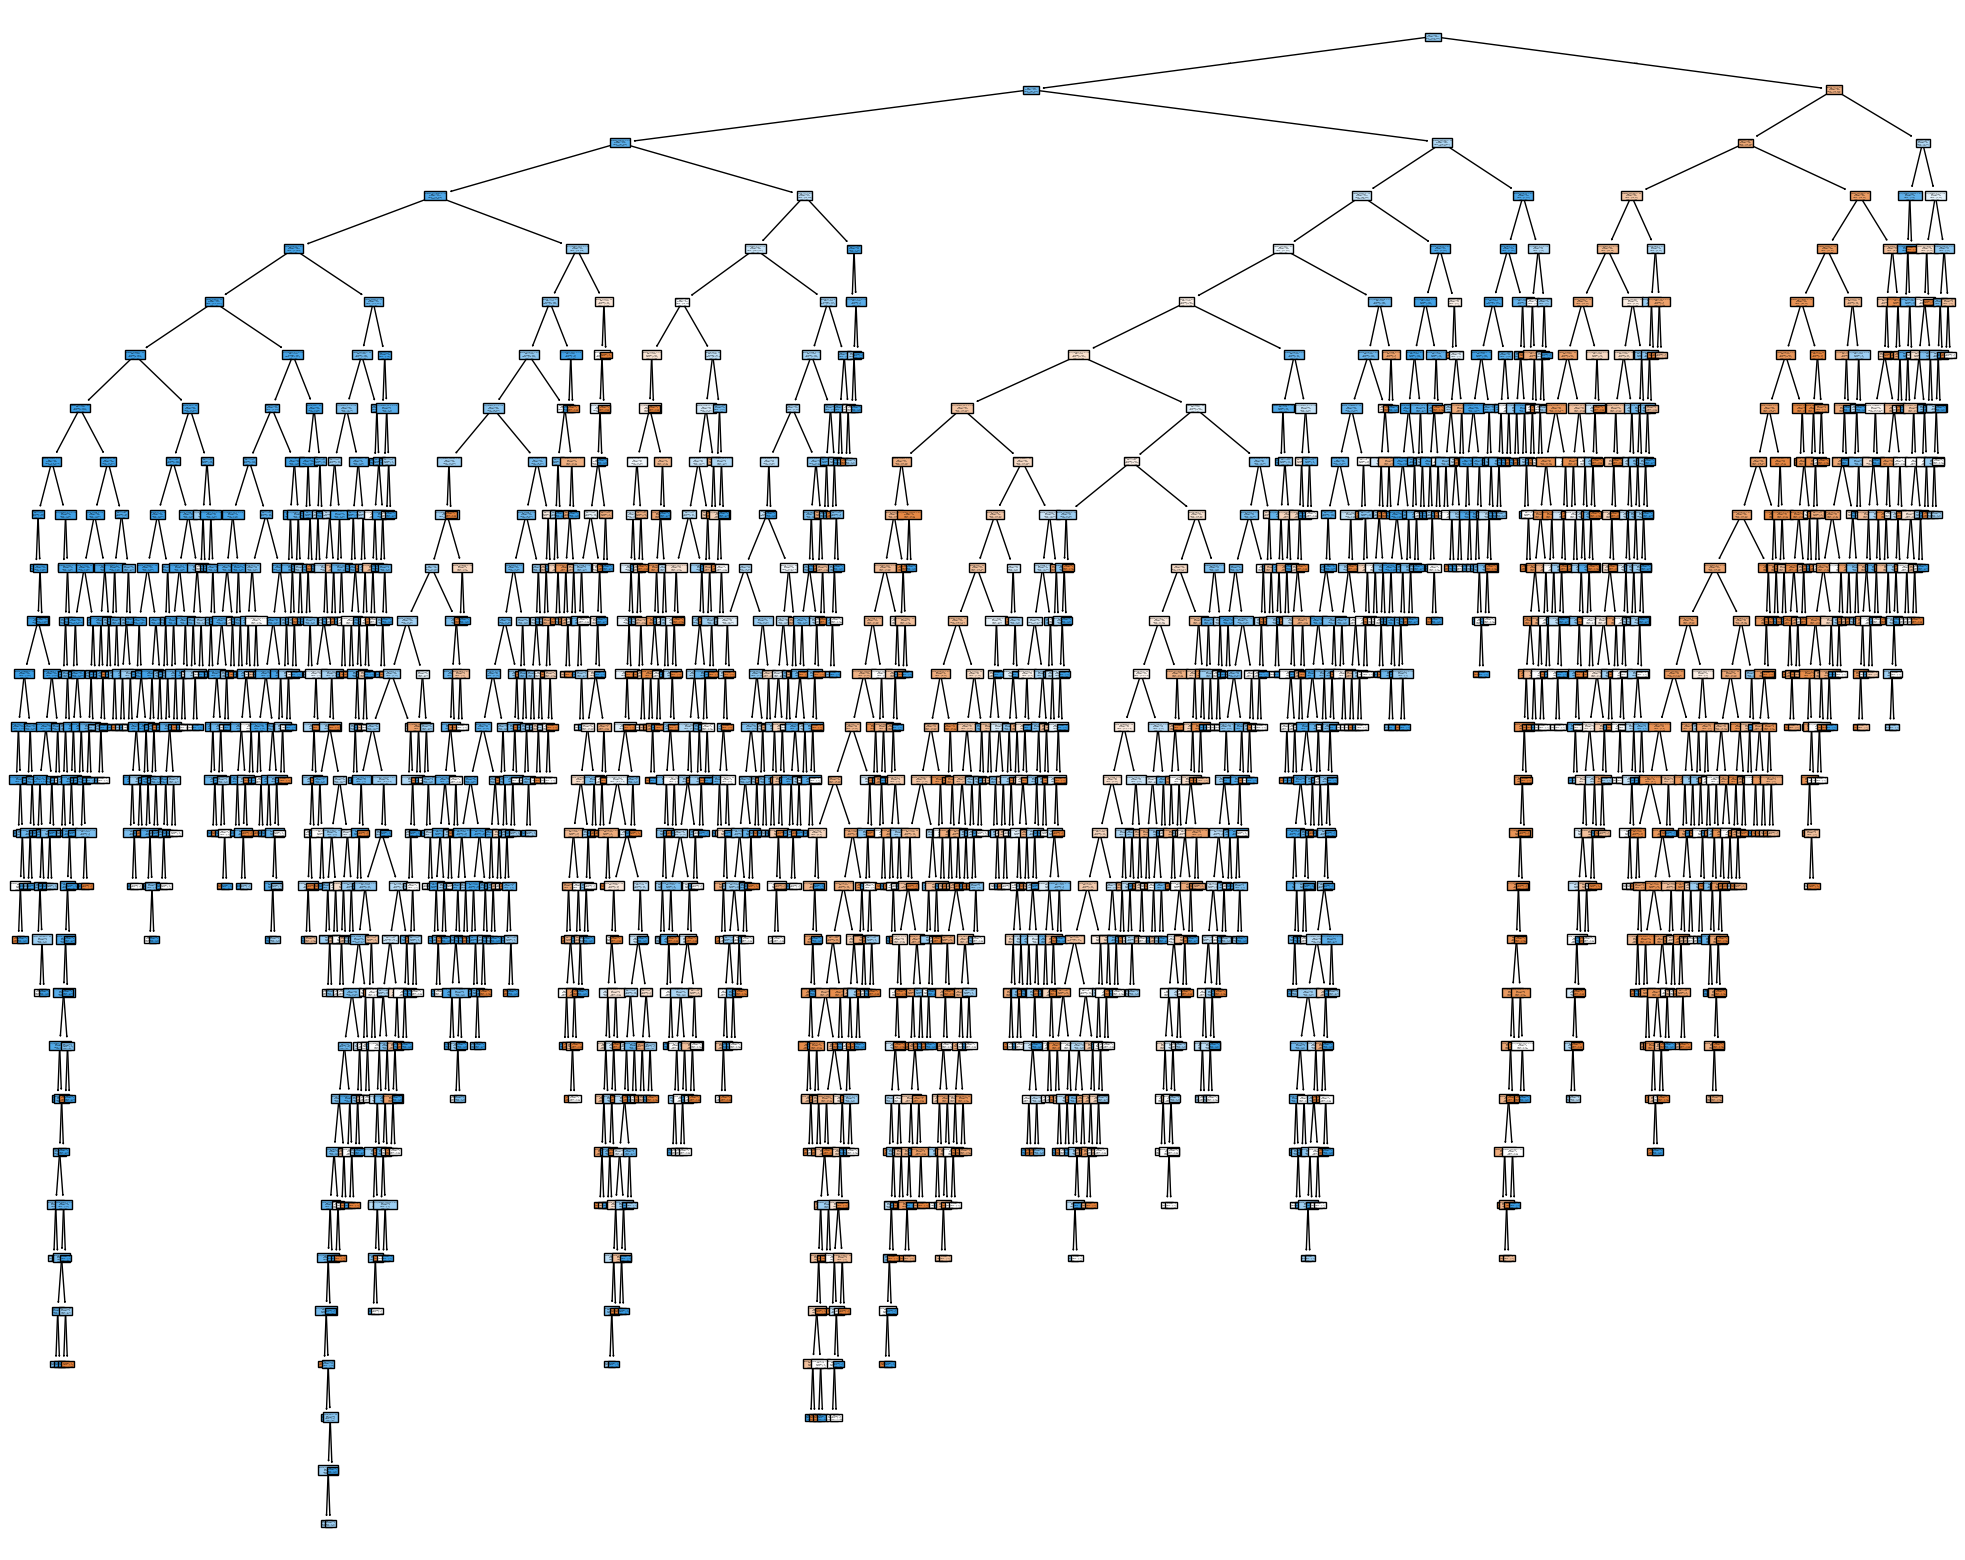

In [55]:
plt.figure(figsize=(25,20))
plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
plt.tight_layout
plt.savefig('decision_tree_v1.png', dpi=300, bbox_inches='tight')
plt.show()


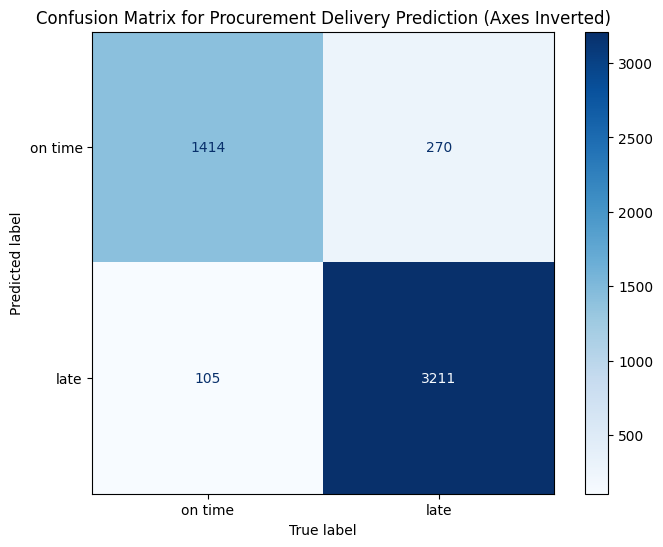

In [56]:
y_pred = tree.predict(transactions3[features])
y_true = transactions3['late']
cm = confusion_matrix(y_true, y_pred)
cm_transposed = cm.T

disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.savefig('confusion_matrix_v1.png', dpi=300, bbox_inches='tight')
plt.show()

In [57]:
accuracy_score(y_true = y_true , y_pred = y_pred)

0.925

In [58]:
recall_score(y_true = y_true , y_pred = y_pred)

0.9224360815857512

In [59]:
precision_score(y_true = y_true , y_pred = y_pred)

0.968335343787696

In [60]:
transactions2['price']

0        22.469120
1        20.305007
2        18.089271
3        94.439540
4        19.526868
           ...    
4995     18.194036
4996     21.810675
4997     32.132725
4998     41.981564
4999    165.243890
Name: price, Length: 5000, dtype: float64

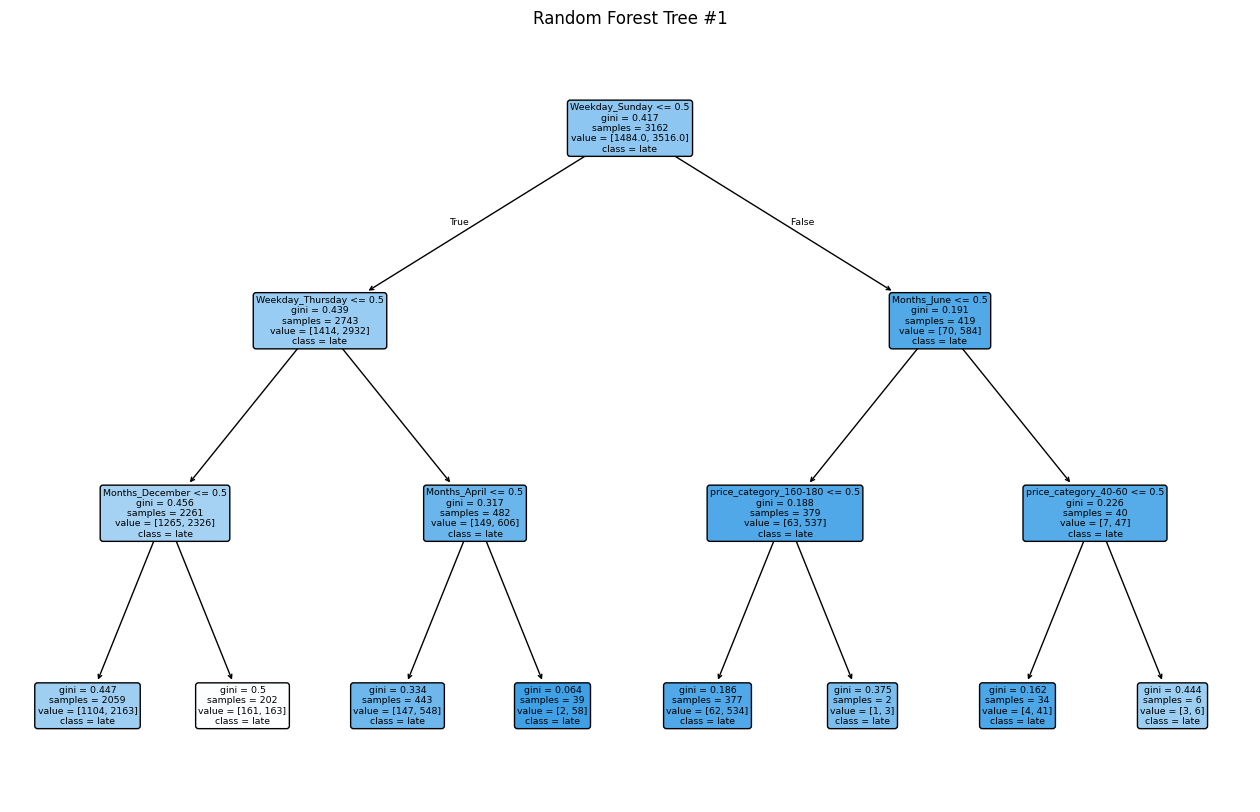

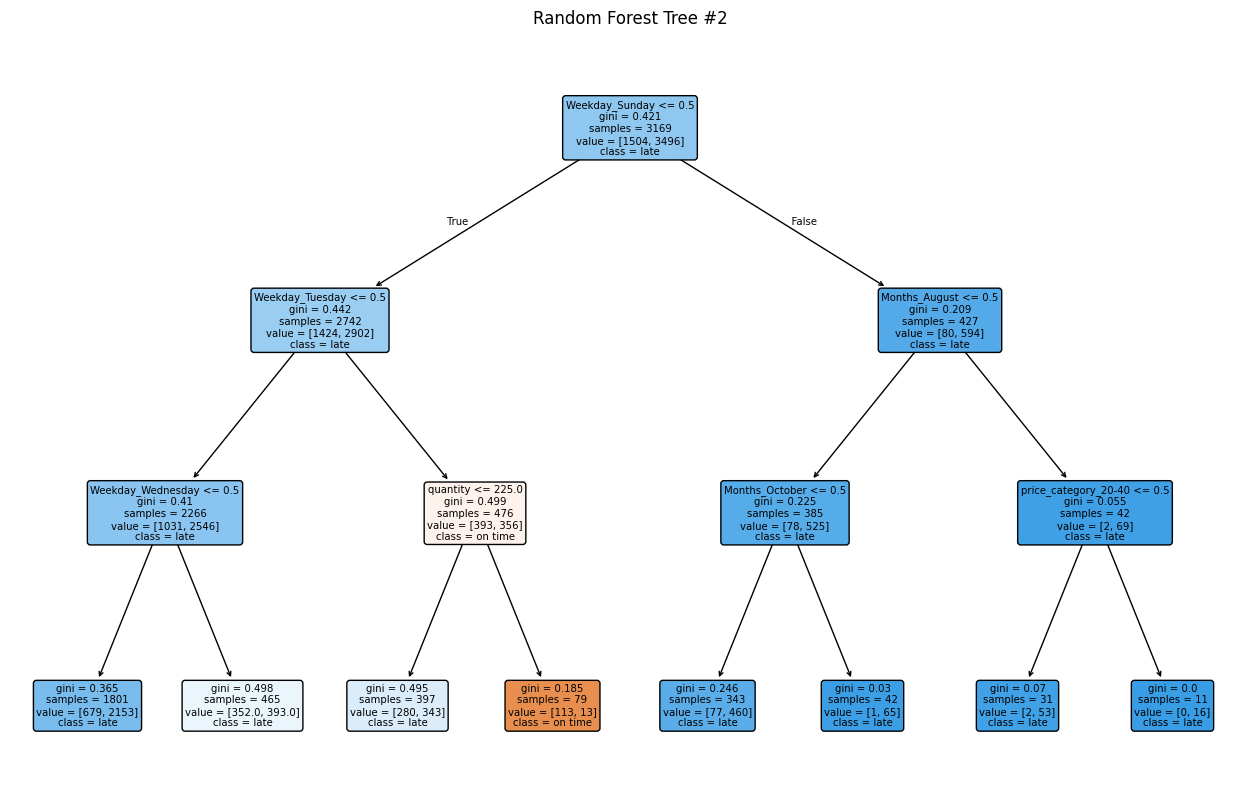

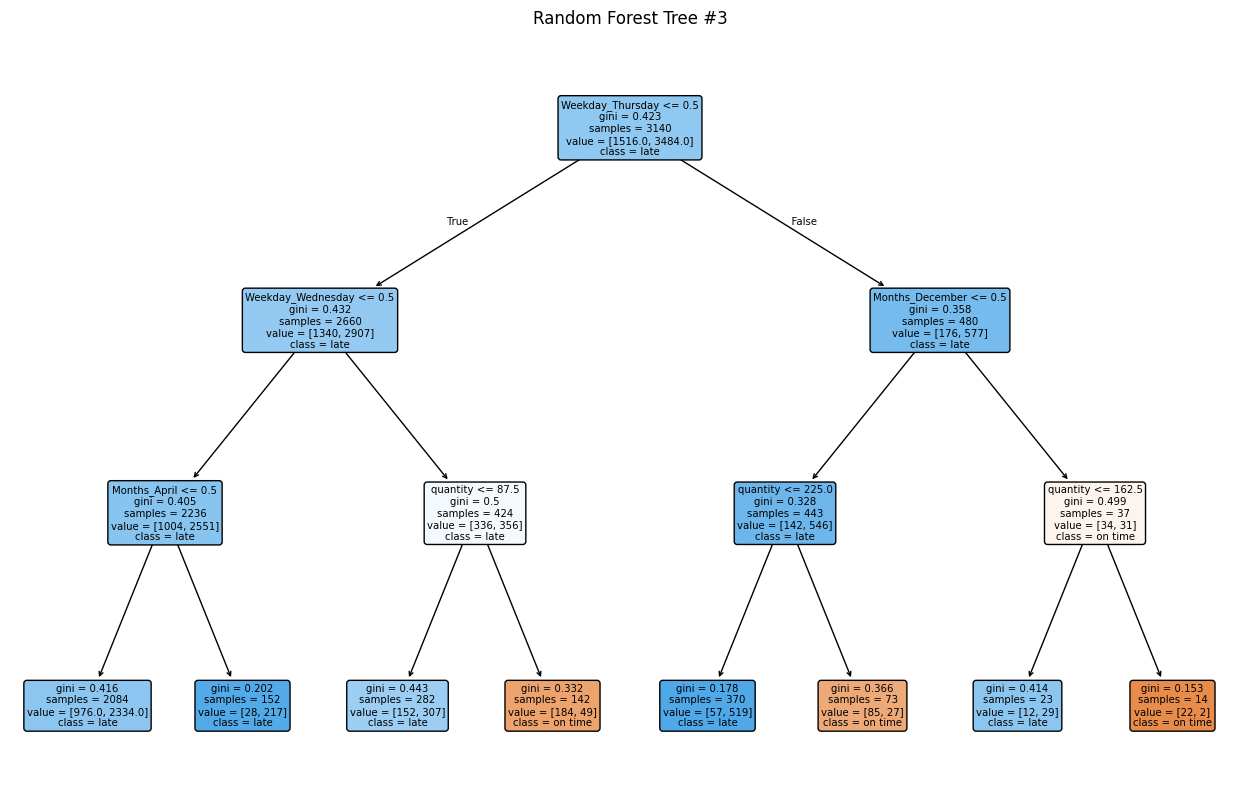

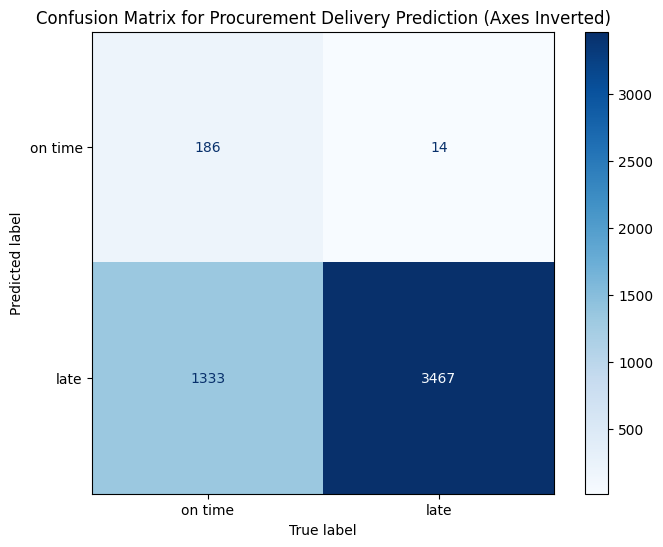

Accuracy: 73.06 %
Precision: 72.23 %
Sensitivity: 99.60 %


In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

# Set the run ID and current date for file naming
runID = 'RF_25_Price_Catagorized_'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Create price categories
# Define bins and labels for price categories   

bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

# Convert price categories to dummy variables
transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

# Define the features to be used in the model

features = (['quantity'] + 
[col for col in transactions3.columns if col.startswith('Months_')] + 
[col for col in transactions3.columns if col.startswith('Weekday_')] +
[col for col in transactions3.columns if col.startswith('price_category_')]);

# Train a Decision Tree Classifier
# tree = DecisionTreeClassifier(max_depth=25)
# tree.fit(X = transactions3[features], y = transactions3['late'])

rf = RandomForestClassifier(n_estimators=100, max_depth=3)
rf.fit(X=transactions3[features], y=transactions['late'])


# Plot the first 3 trees in the random forest

for i in range(3):
    plt.figure(figsize=(16, 10))
    plot_tree(
        rf.estimators_[i],
        feature_names=features,
        class_names=['on time', 'late'],
        filled=True,
        rounded=True,
        max_depth=3  # Optional: limit depth for readability
    )
    plt.title(f"Random Forest Tree #{i+1}")
    plt.show()



#plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
#plt.tight_layout
#plt.savefig('Decision_Trees/'+runID+'decision_tree_v_'+now_str+'.png', dpi=300, bbox_inches='tight')

#plt.show()

# Make predictions on the training data

# Evaluate the model using confusion matrix
# y_pred = tree.predict(transactions3[features])
rf_pred = rf.predict(transactions3[features])
y_true = transactions3['late']
cm = confusion_matrix(y_true, rf_pred)
cm_transposed = cm.T

# Create a confusion matrix display with transposed axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
#plt.savefig('Confusion_matrix/'+runID+'confusion_matrix_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
plt.show()

accuracy = accuracy_score(y_true = y_true , y_pred = rf_pred)
precision = precision_score(y_true = y_true , y_pred = rf_pred)
sensitivity = recall_score(y_true = y_true , y_pred = rf_pred)

print (f"Accuracy: {accuracy * 100:.2f} %")
print (f"Precision: {precision * 100:.2f} %")
print (f"Sensitivity: {sensitivity * 100:.2f} %")   

output_text = (
    f"Accuracy: {accuracy * 100:.2f} %\n"
    f"Precision: {precision * 100:.2f} %\n"
    f"Sensitivity: {sensitivity * 100:.2f} %"
)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
plt.text(0.01, 0.5, output_text, fontsize=14, va='center', ha='left')
#plt.savefig(f'Performance_Measurement/{runID}metrics_output_{now_str}.png', bbox_inches='tight', dpi=300)
plt.close()


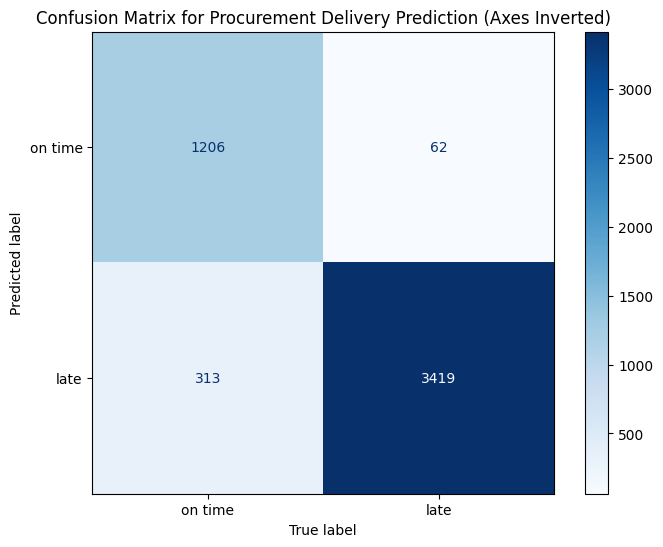

Accuracy: 92.50 %
Precision: 91.61 %
Sensitivity: 98.22 %


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

# Set the run ID and current date for file naming
runID = 'GB_25_Price_Catagorized_'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Create price categories
# Define bins and labels for price categories   

bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

# Convert price categories to dummy variables
transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

# Define the features to be used in the model

features = (['quantity'] + 
[col for col in transactions3.columns if col.startswith('Months_')] + 
[col for col in transactions3.columns if col.startswith('Weekday_')] +
[col for col in transactions3.columns if col.startswith('price_category_')]);

# Train a Gradiant booster Classifier with depth of 25
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=25)
gbm.fit(X=transactions3[features], y=transactions3['late'])

# How to plot trees in Gradient Boosting Classifier?



#plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
#plt.tight_layout
#plt.savefig('Decision_Trees/'+runID+'decision_tree_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
#plt.show()

# Make predictions on the training data
gbm_pred = gbm.predict(transactions3[features])
y_true = transactions3['late']
cm = confusion_matrix(y_true, gbm_pred)
cm_transposed = cm.T

# Create a confusion matrix display with transposed axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
#plt.savefig('Confusion_matrix/'+runID+'confusion_matrix_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
plt.show()

accuracy = accuracy_score(y_true = y_true , y_pred = gbm_pred)
precision = precision_score(y_true = y_true , y_pred = gbm_pred)
sensitivity = recall_score(y_true = y_true , y_pred = gbm_pred)

print (f"Accuracy: {accuracy * 100:.2f} %")
print (f"Precision: {precision * 100:.2f} %")
print (f"Sensitivity: {sensitivity * 100:.2f} %")   

output_text = (
    f"Accuracy: {accuracy * 100:.2f} %\n"
    f"Precision: {precision * 100:.2f} %\n"
    f"Sensitivity: {sensitivity * 100:.2f} %"
)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
plt.text(0.01, 0.5, output_text, fontsize=14, va='center', ha='left')
#plt.savefig(f'Performance_Measurement/{runID}metrics_output_{now_str}.png', bbox_inches='tight', dpi=300)
plt.close()


### Finding Optimal Depth

Max depth: 3, Test accuracy: 0.76, Train accuracy: 0.80
Max depth: 4, Test accuracy: 0.77, Train accuracy: 0.81
Max depth: 5, Test accuracy: 0.78, Train accuracy: 0.81
Max depth: 6, Test accuracy: 0.78, Train accuracy: 0.82
Max depth: 7, Test accuracy: 0.78, Train accuracy: 0.83
Max depth: 8, Test accuracy: 0.77, Train accuracy: 0.84
Max depth: 9, Test accuracy: 0.77, Train accuracy: 0.85
Max depth: 10, Test accuracy: 0.76, Train accuracy: 0.87
Max depth: 11, Test accuracy: 0.74, Train accuracy: 0.88
Max depth: 12, Test accuracy: 0.75, Train accuracy: 0.89
Max depth: 13, Test accuracy: 0.75, Train accuracy: 0.90
Max depth: 14, Test accuracy: 0.75, Train accuracy: 0.91
Max depth: 15, Test accuracy: 0.75, Train accuracy: 0.91
Max depth: 16, Test accuracy: 0.74, Train accuracy: 0.92
Max depth: 17, Test accuracy: 0.74, Train accuracy: 0.92
Max depth: 18, Test accuracy: 0.73, Train accuracy: 0.92
Max depth: 19, Test accuracy: 0.73, Train accuracy: 0.93
Max depth: 20, Test accuracy: 0.73, Tr

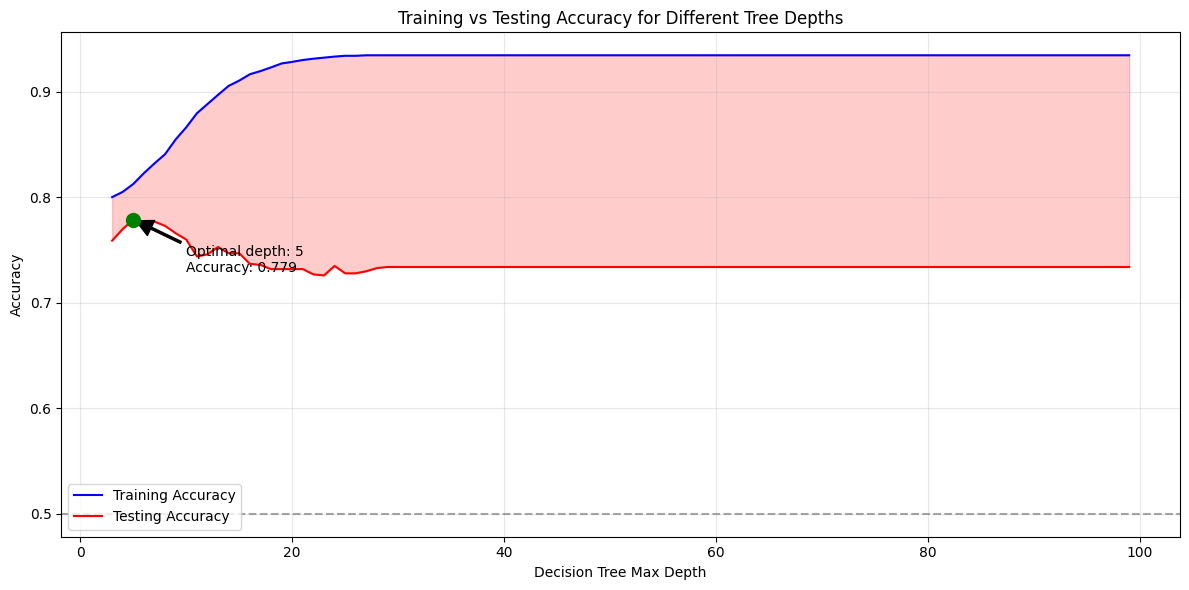

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

maxdepth = 25
runID = 'DT_' + str(maxdepth) + '_Price_Catagorized_'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Create price categories
# Define bins and labels for price categories   

bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

# Convert price categories to dummy variables
transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

# Define the features to be used in the model

# features = (['quantity'] + 
# [col for col in transactions3.columns if col.startswith('Months_')] + 
# [col for col in transactions3.columns if col.startswith('Weekday_')] +
# [col for col in transactions3.columns if col.startswith('price_category_')]);

features = (['quantity'] + 
[col for col in transactions3.columns if col.startswith('Months_')] + 
[col for col in transactions3.columns if col.startswith('Weekday_')] +
[col for col in transactions3.columns if col.startswith('price_category_')]);




depths = list(range(3, 100))
train_accuracies = []
test_accuracies = []
random_var = 2025

X_train, X_test, y_train, y_test = train_test_split(
    transactions3[features], 
    transactions3['late'],
    test_size=0.2, 
    random_state=random_var
)

for i in range(3, 30):
    tree_overfitted = DecisionTreeClassifier(max_depth=i, random_state=random_var)
    tree_overfitted.fit(X=X_train, y=y_train)
    
    y_pred_test = tree_overfitted.predict(X_test)
    y_pred_train = tree_overfitted.predict(X_train)
    
    print(f"Max depth: {i}, Test accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_test):.2f}, Train accuracy: {accuracy_score(y_true=y_train, y_pred=y_pred_train):.2f}")


# Loop over different max depths
for i in depths:
    tree_model = DecisionTreeClassifier(max_depth=i, random_state=random_var)
    tree_model.fit(X=X_train, y=y_train)
    
    # Predict and calculate accuracy
    y_pred_test = tree_model.predict(X_test)
    y_pred_train = tree_model.predict(X_train)
    
    train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(depths, test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Decision Tree Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Different Tree Depths')
plt.legend()
plt.grid(True, alpha=0.3)

# Add a horizontal line showing baseline performance
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Baseline (50%)')

# Add annotation for optimal depth
optimal_depth_index = np.argmax(test_accuracies)
optimal_depth = depths[optimal_depth_index]
optimal_accuracy = test_accuracies[optimal_depth_index]

plt.scatter(optimal_depth, optimal_accuracy, color='green', s=100, zorder=5)
plt.annotate(f'Optimal depth: {optimal_depth}\nAccuracy: {optimal_accuracy:.3f}', 
             xy=(optimal_depth, optimal_accuracy),
             xytext=(optimal_depth+5, optimal_accuracy-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

# Shade the overfitting region
plt.fill_between(depths, train_accuracies, test_accuracies, 
                 where=(np.array(train_accuracies) > np.array(test_accuracies)), 
                 color='red', alpha=0.2, label='Overfitting region')

plt.tight_layout()
plt.savefig(f'Performance_Measurement/DT_depth_accuracy_comparison_{now_str}.png', dpi=300)
plt.show()

Max depth: 3, Test accuracy: 0.71, Train accuracy: 0.74
Max depth: 4, Test accuracy: 0.73, Train accuracy: 0.77
Max depth: 5, Test accuracy: 0.74, Train accuracy: 0.79
Max depth: 6, Test accuracy: 0.76, Train accuracy: 0.81
Max depth: 7, Test accuracy: 0.76, Train accuracy: 0.82
Max depth: 8, Test accuracy: 0.76, Train accuracy: 0.83
Max depth: 9, Test accuracy: 0.76, Train accuracy: 0.85
Max depth: 10, Test accuracy: 0.76, Train accuracy: 0.86
Max depth: 11, Test accuracy: 0.77, Train accuracy: 0.87
Max depth: 12, Test accuracy: 0.78, Train accuracy: 0.89
Max depth: 13, Test accuracy: 0.78, Train accuracy: 0.90
Max depth: 14, Test accuracy: 0.78, Train accuracy: 0.90
Max depth: 15, Test accuracy: 0.77, Train accuracy: 0.91
Max depth: 16, Test accuracy: 0.77, Train accuracy: 0.92
Max depth: 17, Test accuracy: 0.76, Train accuracy: 0.92
Max depth: 18, Test accuracy: 0.77, Train accuracy: 0.93
Max depth: 19, Test accuracy: 0.76, Train accuracy: 0.93
Max depth: 20, Test accuracy: 0.75, Tr

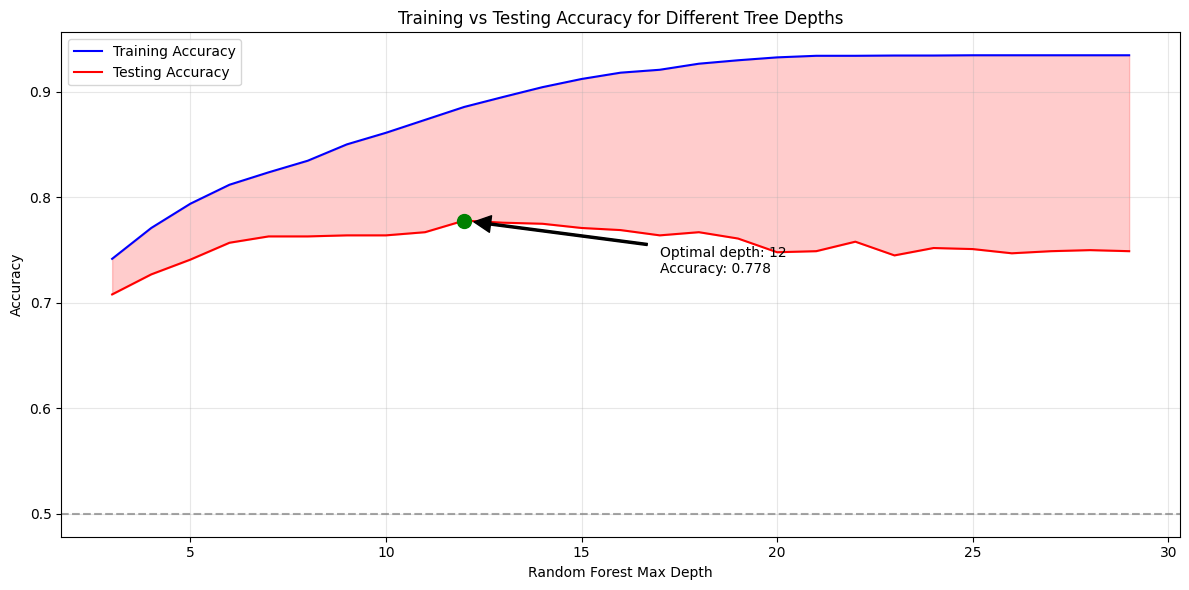

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

maxdepth = 25
runID = 'RF_' + str(maxdepth) + '_Price_Catagorized_'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Create price categories
# Define bins and labels for price categories   

bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

# Convert price categories to dummy variables
transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

# Define the features to be used in the model

# features = (['quantity'] + 
# [col for col in transactions3.columns if col.startswith('Months_')] + 
# [col for col in transactions3.columns if col.startswith('Weekday_')] +
# [col for col in transactions3.columns if col.startswith('price_category_')]);

features = (['quantity'] + 
[col for col in transactions3.columns if col.startswith('Months_')] + 
[col for col in transactions3.columns if col.startswith('Weekday_')] +
[col for col in transactions3.columns if col.startswith('price_category_')]);




depths = list(range(3, 30))
train_accuracies = []
test_accuracies = []
random_var = 2025

X_train, X_test, y_train, y_test = train_test_split(
    transactions3[features], 
    transactions3['late'],
    test_size=0.2, 
    random_state=random_var
)

for i in range(3, 30):
    rf_overfitted = RandomForestClassifier(n_estimators=100, max_depth= i, random_state=random_var)
    rf_overfitted.fit(X=X_train, y=y_train)
    
    y_pred_test = rf_overfitted.predict(X_test)
    y_pred_train = rf_overfitted.predict(X_train)
    
    print(f"Max depth: {i}, Test accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_test):.2f}, Train accuracy: {accuracy_score(y_true=y_train, y_pred=y_pred_train):.2f}")


# Loop over different max depths
for i in depths:
    rf_model = RandomForestClassifier(n_estimators=100, max_depth= i, random_state=random_var)
    rf_model.fit(X=X_train, y=y_train)
    
    # Predict and calculate accuracy
    y_pred_test = rf_model.predict(X_test)
    y_pred_train = rf_model.predict(X_train)
    
    train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(depths, test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Random Forest Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Different Tree Depths')
plt.legend()
plt.grid(True, alpha=0.3)

# Add a horizontal line showing baseline performance
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Baseline (50%)')

# Add annotation for optimal depth
optimal_depth_index = np.argmax(test_accuracies)
optimal_depth = depths[optimal_depth_index]
optimal_accuracy = test_accuracies[optimal_depth_index]

plt.scatter(optimal_depth, optimal_accuracy, color='green', s=100, zorder=5)
plt.annotate(f'Optimal depth: {optimal_depth}\nAccuracy: {optimal_accuracy:.3f}', 
             xy=(optimal_depth, optimal_accuracy),
             xytext=(optimal_depth+5, optimal_accuracy-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

# Shade the overfitting region
plt.fill_between(depths, train_accuracies, test_accuracies, 
                 where=(np.array(train_accuracies) > np.array(test_accuracies)), 
                 color='red', alpha=0.2, label='Overfitting region')

plt.tight_layout()
plt.savefig(f'Performance_Measurement/RF_depth_accuracy_comparison_{now_str}.png', dpi=300)
plt.show()

Max depth: 3, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 4, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 5, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 6, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 7, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 8, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 9, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 10, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 11, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 12, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 13, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 14, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 15, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 16, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 17, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 18, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 19, Test accuracy: 0.67, Train accuracy: 0.70
Max depth: 20, Test accuracy: 0.67, Tr

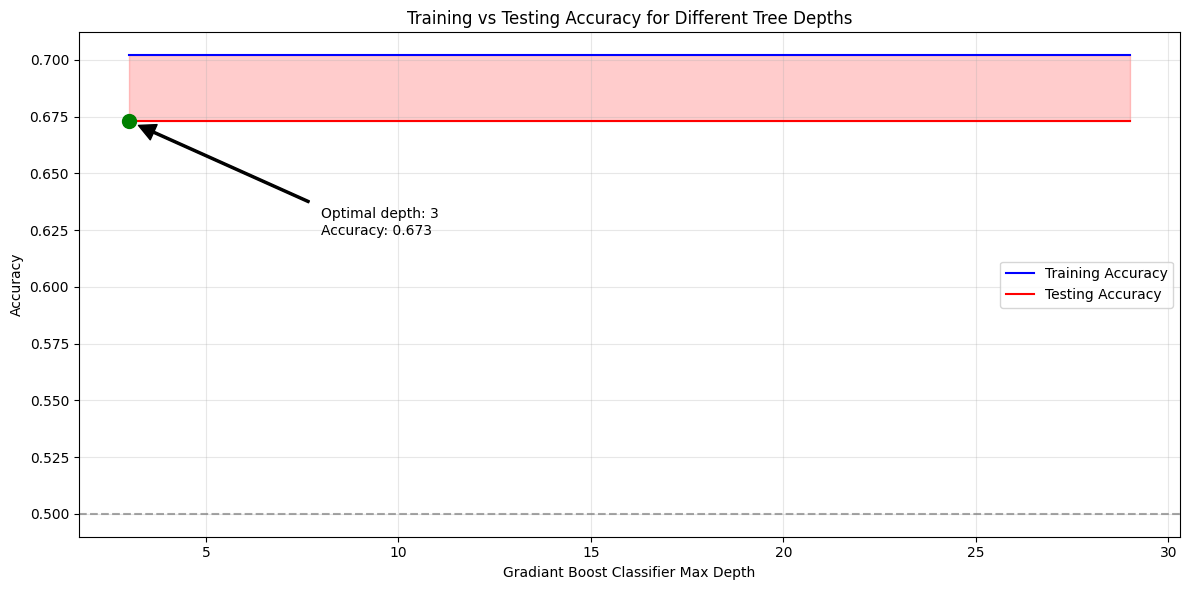

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.model_selection import train_test_split
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

maxdepth = 25
runID = 'RF_' + str(maxdepth) + '_Price_Catagorized_'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Create price categories
# Define bins and labels for price categories   

bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

# Convert price categories to dummy variables
transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

# Define the features to be used in the model

# features = (['quantity'] + 
# [col for col in transactions3.columns if col.startswith('Months_')] + 
# [col for col in transactions3.columns if col.startswith('Weekday_')] +
# [col for col in transactions3.columns if col.startswith('price_category_')]);

features = ([col for col in transactions3.columns if col.startswith('Months_')] );




depths = list(range(3, 30))
train_accuracies = []
test_accuracies = []
random_var = 2025

X_train, X_test, y_train, y_test = train_test_split(
    transactions3[features], 
    transactions3['late'],
    test_size=0.2, 
    random_state=random_var
)

for i in range(3, 30):
    tree_model = GradientBoostingClassifier(max_depth=5, n_estimators=i, random_state=random_var)
    tree_model.fit(X=X_train, y=y_train)
    
    y_pred_test = tree_model.predict(X_test)
    y_pred_train = tree_model.predict(X_train)
    
    print(f"Max depth: {i}, Test accuracy: {accuracy_score(y_true=y_test, y_pred=y_pred_test):.2f}, Train accuracy: {accuracy_score(y_true=y_train, y_pred=y_pred_train):.2f}")


# Loop over different max depths
for i in depths:
    tree_model = GradientBoostingClassifier(max_depth=30, n_estimators=i, random_state=random_var)
    tree_model.fit(X=X_train, y=y_train)
    
    # Predict and calculate accuracy
    y_pred_test = tree_model.predict(X_test)
    y_pred_train = tree_model.predict(X_train)
    
    train_acc = accuracy_score(y_true=y_train, y_pred=y_pred_train)
    test_acc = accuracy_score(y_true=y_test, y_pred=y_pred_test)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', color='blue')
plt.plot(depths, test_accuracies, label='Testing Accuracy', color='red')
plt.xlabel('Gradiant Boost Classifier Max Depth')
plt.ylabel('Accuracy')
plt.title('Training vs Testing Accuracy for Different Tree Depths')
plt.legend()
plt.grid(True, alpha=0.3)

# Add a horizontal line showing baseline performance
plt.axhline(y=0.5, color='gray', linestyle='--', alpha=0.7, label='Baseline (50%)')

# Add annotation for optimal depth
optimal_depth_index = np.argmax(test_accuracies)
optimal_depth = depths[optimal_depth_index]
optimal_accuracy = test_accuracies[optimal_depth_index]

plt.scatter(optimal_depth, optimal_accuracy, color='green', s=100, zorder=5)
plt.annotate(f'Optimal depth: {optimal_depth}\nAccuracy: {optimal_accuracy:.3f}', 
             xy=(optimal_depth, optimal_accuracy),
             xytext=(optimal_depth+5, optimal_accuracy-0.05),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=10)

# Shade the overfitting region
plt.fill_between(depths, train_accuracies, test_accuracies, 
                 where=(np.array(train_accuracies) > np.array(test_accuracies)), 
                 color='red', alpha=0.2, label='Overfitting region')

plt.tight_layout()
#plt.savefig(f'Performance_Measurement/GBC_depth_accuracy_comparison_{now_str}.png', dpi=300)
plt.show()

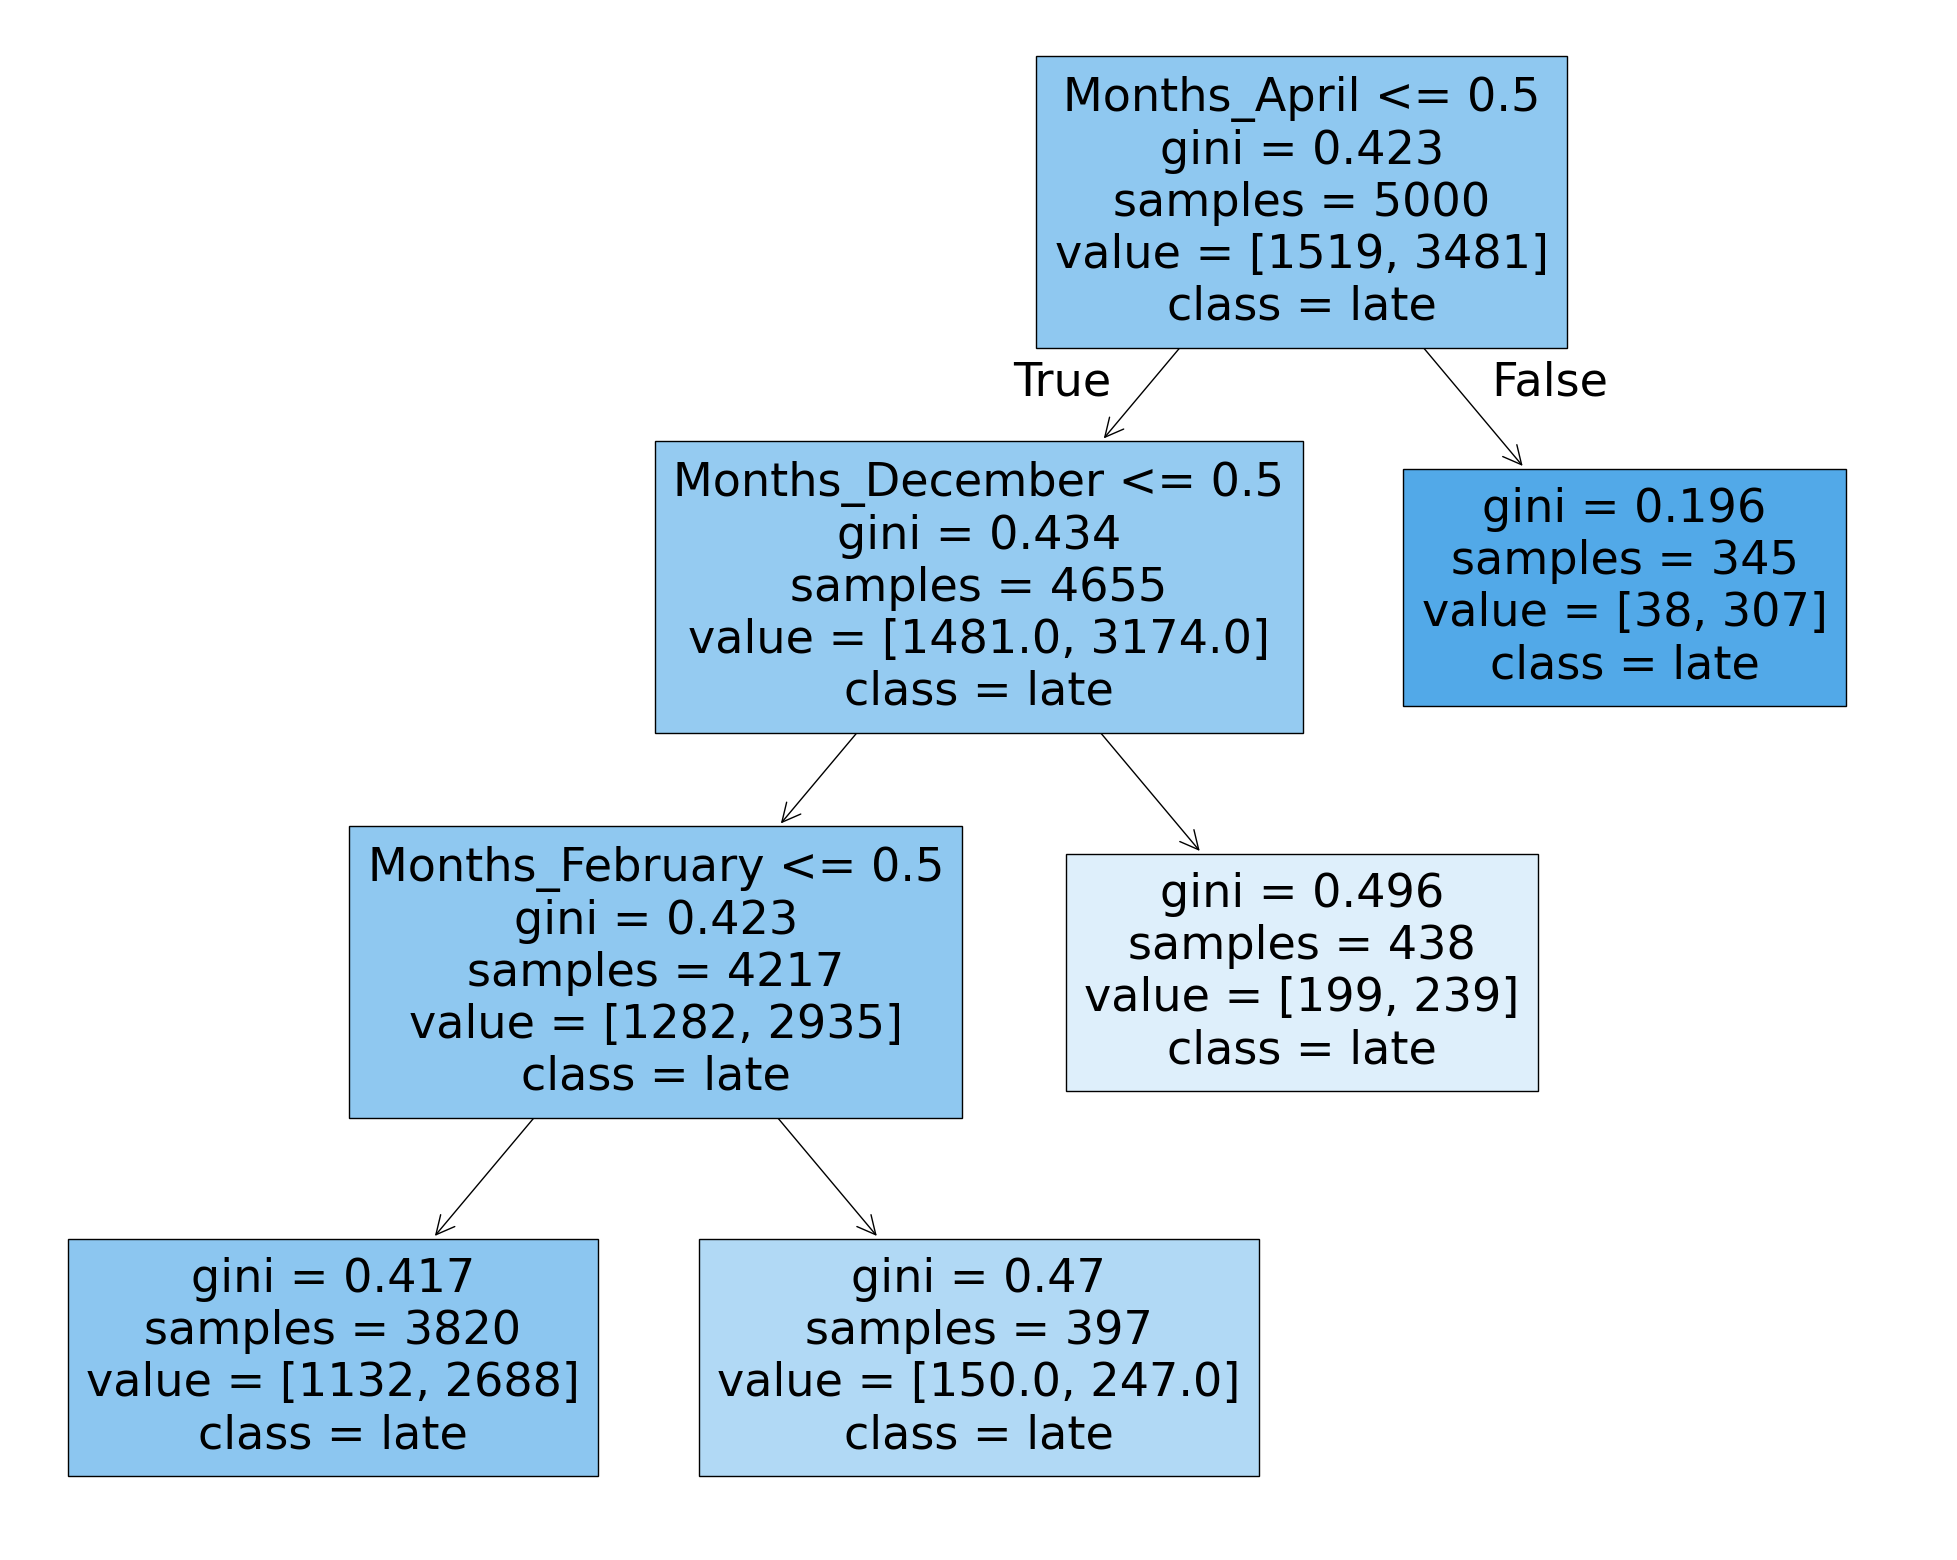

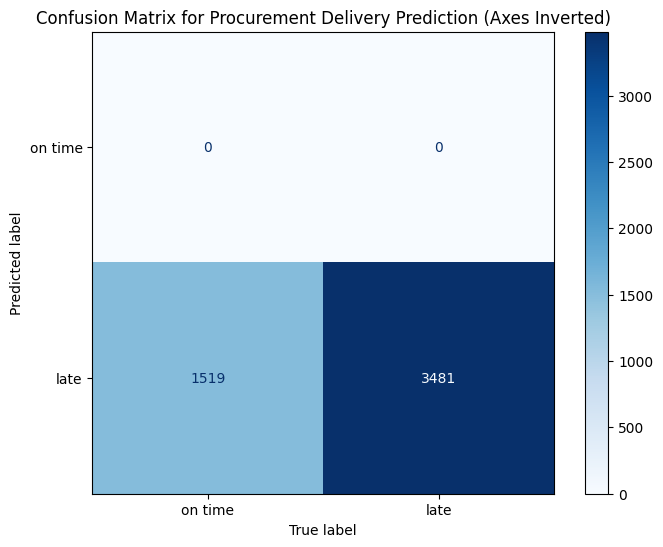

Accuracy: 69.62 %
Precision: 69.62 %
Sensitivity: 100.00 %


In [18]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier , plot_tree
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score , precision_score , recall_score
import os
from datetime import datetime

# Set the run ID and current date for file naming
maxdepth = 3
runID = 'DT_' + str(maxdepth) + '_MonthOnly'
now_str = datetime.now().strftime("%Y%m%d")

# Load the datasets
customer = pd.read_excel('customer.xlsx');
logistic_partners = pd.read_excel('logistic_partner.xlsx');
transactions = pd.read_excel('sales_transactions_star_schema.xlsx');
materials = pd.read_excel('material.xlsx');
warehouse = pd.read_excel('warehouse.xlsx');

# Convert date columns to datetime.date format
transactions["requested_date"]= pd.to_datetime(transactions["requested_date"]).dt.date;
transactions["received_date"]= pd.to_datetime(transactions["received_date"]).dt.date;

# Create a new column to indicate if the transaction is late
transactions["late"]= transactions["requested_date"] < pd.to_datetime(transactions["received_date"])

# Extract weekday and month names from the date columns
transactions["Weekday"] = pd.to_datetime(transactions["requested_date"]).dt.day_name()
transactions["Months"] = pd.to_datetime(transactions["received_date"]).dt.month_name()

# Convert categorical variables to dummy variables
transactions2 = pd.get_dummies(transactions, columns=['Weekday'])
transactions2 = pd.get_dummies(transactions2, columns=['Months'])

# Create price categories
# Define bins and labels for price categories   

bins = [0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220]
labels = [
        '0-20', '20-40', '40-60', '60-80', '80-100',
        '100-120', '120-140', '140-160', '160-180', '180-200', '200-220'
    ]
transactions2['price_category'] = pd.cut(transactions2['price'], bins=bins, labels=labels, right=False)

# Convert price categories to dummy variables
transactions3 = pd.get_dummies(transactions2, columns=['price_category'])

# Define the features to be used in the model

# features = (['quantity'] + 
# # [col for col in transactions3.columns if col.startswith('Months_')] + 
# # [col for col in transactions3.columns if col.startswith('Weekday_')] +
# [col for col in transactions3.columns if col.startswith('price_category_')]);
features = ([col for col in transactions3.columns if col.startswith('Months_')] );

# Train a Decision Tree Classifier
tree = DecisionTreeClassifier(max_depth=maxdepth)
tree.fit(X = transactions3[features], y = transactions3['late'])

# Make predictions on the training data
plt.figure(figsize=(25,20))
plot_tree(tree, feature_names=features, class_names=['on time','late'], filled=True)
plt.tight_layout
plt.savefig('Decision_Trees/'+runID+'decision_tree_v_'+now_str+'.png', dpi=300, bbox_inches='tight')

plt.show()

# Evaluate the model using confusion matrix
y_pred = tree.predict(transactions3[features])
y_true = transactions3['late']
cm = confusion_matrix(y_true, y_pred)
cm_transposed = cm.T

# Create a confusion matrix display with transposed axes
disp = ConfusionMatrixDisplay(confusion_matrix=cm_transposed, 
                             display_labels=['on time', 'late'])

# Create a figure and plot
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='Blues')
plt.xlabel('True label')  # This will now be on the x-axis
plt.ylabel('Predicted label')  # This will now be on the y-axis
plt.title('Confusion Matrix for Procurement Delivery Prediction (Axes Inverted)')
plt.savefig('Confusion_matrix/'+runID+'confusion_matrix_v_'+now_str+'.png', dpi=300, bbox_inches='tight')
plt.show()

accuracy = accuracy_score(y_true = y_true , y_pred = y_pred)
precision = precision_score(y_true = y_true , y_pred = y_pred)
sensitivity = recall_score(y_true = y_true , y_pred = y_pred)

print (f"Accuracy: {accuracy * 100:.2f} %")
print (f"Precision: {precision * 100:.2f} %")
print (f"Sensitivity: {sensitivity * 100:.2f} %")   

output_text = (
    f"Accuracy: {accuracy * 100:.2f} %\n"
    f"Precision: {precision * 100:.2f} %\n"
    f"Sensitivity: {sensitivity * 100:.2f} %"
)

# Create a figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # Hide axes
plt.text(0.01, 0.5, output_text, fontsize=14, va='center', ha='left')
plt.savefig(f'Performance_Measurement/{runID}metrics_output_{now_str}.png', bbox_inches='tight', dpi=300)
plt.close()
